#Sprint 1

=== Método Gráfico de Programación Lineal (Forma Estándar) ===
Forma estándar: Maximizar Z = c1*x1 + c2*x2
Sujeto a restricciones del tipo a1*x1 + a2*x2 <= b, con x1, x2 >= 0

Ingrese los coeficientes de la función objetivo (c1 c2): 3 5
¿Cuántas restricciones desea ingresar?: 3

Restricción 1: formato -> a1 a2 <= b
Ingrese los valores a1 a2 b: 1 0 4

Restricción 2: formato -> a1 a2 <= b
Ingrese los valores a1 a2 b: 0 2 12

Restricción 3: formato -> a1 a2 <= b
Ingrese los valores a1 a2 b: 3 2 18

========== RESULTADO ==========
R/ Los valores de x1 y x2 respectivamente son 2.00 y 6.00
Valor óptimo de Z = 36.00


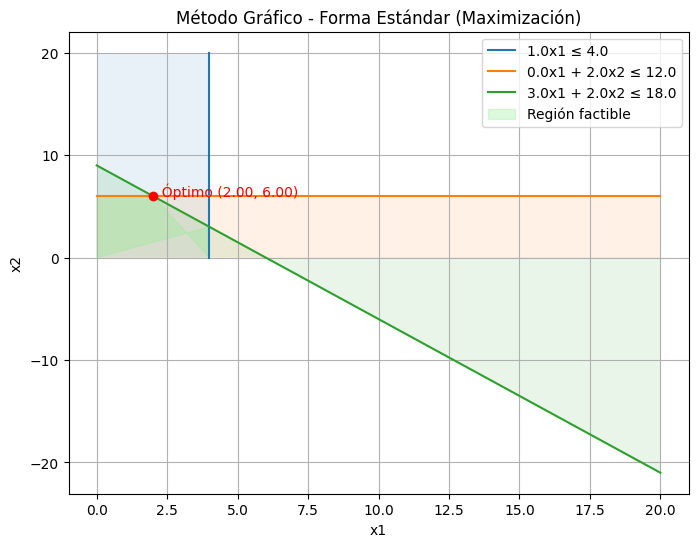

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

print("=== Método Gráfico de Programación Lineal (Forma Estándar) ===")
print("Forma estándar: Maximizar Z = c1*x1 + c2*x2")
print("Sujeto a restricciones del tipo a1*x1 + a2*x2 <= b, con x1, x2 >= 0\n")

# ===== ENTRADA =====
c1, c2 = map(float, input("Ingrese los coeficientes de la función objetivo (c1 c2) formato ej(3 2): ").split())
n = int(input("¿Cuántas restricciones desea ingresar?: "))

restricciones = []
#Solo ingresar las restricciones
for i in range(n):
    print(f"\nRestricción {i+1}: formato -> a1 a2 <= b ej (3 2 18)")
    a1, a2, b = map(float, input("Ingrese los valores x1 x2 b: ").split())
    restricciones.append((a1, a2, b))

# Añadimos las restricciones de no negatividad
restricciones.append((1, 0, 0))   # x1 >= 0
restricciones.append((0, 1, 0))   # x2 >= 0

# ===== PROCESAMIENTO =====
x1, x2 = symbols('x1 x2')

# Encontrar puntos de intersección
puntos = []
for i in range(len(restricciones)):
    for j in range(i + 1, len(restricciones)):
        a1, b1, c1r = restricciones[i]
        a2, b2, c2r = restricciones[j]
        ec1 = Eq(a1*x1 + b1*x2, c1r)
        ec2 = Eq(a2*x1 + b2*x2, c2r)
        sol = solve((ec1, ec2), (x1, x2))
        if sol:
            xi, yi = sol[x1], sol[x2]
            if xi.is_real and yi.is_real:
                puntos.append((float(xi), float(yi)))

# Filtrar puntos factibles
def cumple_todas(xv, yv):
    if xv < 0 or yv < 0:
        return False
    for a, b, c in restricciones[:-2]:  # sin incluir x>=0, y>=0
        if a*xv + b*yv > c + 1e-6:
            return False
    return True

p_factibles = [p for p in puntos if cumple_todas(p[0], p[1])]

if not p_factibles:
    print("\nNo hay región factible.")
    exit()

# Evaluar la función objetivo
valores = []
for (xv, yv) in p_factibles:
    z = c1 * xv + c2 * yv
    valores.append((z, xv, yv))

# Encontrar el máximo
z_opt, x_opt, y_opt = max(valores, key=lambda x: x[0])

# ===== RESULTADO =====
print("\n========== RESULTADO ==========")
print(f"R/ Los valores de x1 y x2 respectivamente son {x_opt:.2f} y {y_opt:.2f}")
print(f"Valor óptimo de Z = {z_opt:.2f}")

# ===== GRAFICAR =====
x_vals = np.linspace(0, 20, 400)
plt.figure(figsize=(8,6))

# Graficar cada restricción con sombreado HACIA ABAJO
for a, b, c in restricciones[:-2]:  # sin incluir no negatividad
    if b != 0:
        y = (c - a*x_vals)/b
        plt.plot(x_vals, y, label=f"{a}x1 + {b}x2 ≤ {c}")
        # sombrear hacia abajo (zona válida)
        plt.fill_between(x_vals, 0, y, alpha=0.1)
    else:
        # restricción vertical (x <= c/a)
        x_line = np.full_like(x_vals, c/a)
        plt.plot(x_line, x_vals, label=f"{a}x1 ≤ {c}")
        plt.fill_betweenx(x_vals, 0, x_line, alpha=0.1)

# Región factible resaltada en verde
if len(p_factibles) > 2:
    region = np.array(sorted(p_factibles, key=lambda p: (p[0], p[1])))
    plt.fill(region[:,0], region[:,1], alpha=0.3, color='lightgreen', label="Región factible")

# Punto óptimo
plt.scatter(x_opt, y_opt, color='red', zorder=5)
plt.text(x_opt, y_opt, f"  Óptimo ({x_opt:.2f}, {y_opt:.2f})", color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Método Gráfico - Forma Estándar (Maximización)')
plt.legend()
plt.grid(True)
plt.show()